In [210]:
import pandas as pd
import numpy as np

In [1479]:
datat = pd.read_csv("../train/train_十里店.csv")
datat.drop(3433,inplace=True)
datat['PRIMARY_POLLUTANTS_'].drop_duplicates()

0                PM2.5
30                PM10
154         PM10,PM2.5
208                  -
585                NaN
2467            O3-1小时
2565       PM10,O3-1小时
2814               NO2
3169          NO2,PM10
3597      O3-1小时,PM2.5
7814    NO2,PM10,PM2.5
Name: PRIMARY_POLLUTANTS_, dtype: object

In [1467]:
data = pd.read_csv("../train/train_三瓦窑.csv")
data.drop(3433,inplace=True)

In [1468]:
data['PRIMARY_POLLUTANTS_'].drop_duplicates()

0              PM2.5
85              PM10
157       PM10,PM2.5
210                -
1046             NaN
1728             NO2
1886          O3-1小时
2479        NO2,PM10
2563     PM10,O3-1小时
4862    O3-1小时,PM2.5
8055       NO2,PM2.5
Name: PRIMARY_POLLUTANTS_, dtype: object

In [916]:
date=list()
for i in range(12):
    month=[31,28,31,30,24,30,31,31,30,31,30,24]
    for j in range(1,month[i]+1):
        for k in range(24):
            a='2017/{0}/{1} {2:02d}:00:00'.format(i+1,j,k)
            date.append(a)

In [917]:
date=pd.DataFrame(date)
ab=data.set_index('DATA_TIME_')
bc=date.set_index(0)

In [1290]:
data=pd.concat([ab,bc],axis=1,sort=True)
add=list()
addday=list()
for i in range(8424):
    add.append(i%24+1)
    addday.append(int(i%168/(24)))
data['hour']=add
data['day']=addday
data = data.reset_index(drop=True)

In [705]:
# for j in range(1,13):
#     day=list()
#     for i in range(data.shape[0]):
#         if data['DATA_TIME_'][i].split('/')[1]==str(j):
#             day.append(data['DATA_TIME_'][i].split('/')[2].split(' ')[0])
#     days=pd.Series(day)
#     print(days.drop_duplicates().shape,days.drop_duplicates().shape[0]*24-days.shape[0])

(31,) 1
(28,) 0
(31,) 12
(30,) 6
(25,) 27
(30,) 0
(31,) 0
(31,) 7
(30,) 2
(31,) 0
(30,) 0
(24,) 13


In [1457]:
X=data.drop(['UPDATE_TIME_','MN_','SOURCE_','CATEGORY_','COLOR_','STATE_'],axis=1)

In [1458]:
def delcolumns(X):
    indx=list()
    for i in range(X.shape[1]):
        a=X.iloc[:,i].isnull().sum()
        if a/X.shape[0]>0.5:
            indx.append(i)
    X=X.drop(X.columns[indx],axis=1)
    return X
X=delcolumns(X)

In [1459]:
def hanNaN(X):
    for feature_num,feature in enumerate(X.columns):
        feature_index=X[X[feature].isnull()].index
        for i in range(len(feature_index)):
            if feature_index[i]==0:
                j=feature_index[i]+1
                while j in feature_index:
                    j=j+1
                X.iloc[feature_index[i],feature_num]=X.iloc[j,feature_num]
            else:
                j=feature_index[i]

                while j in feature_index:
                    j=j-1
                    if j==0:
                        break
                X.iloc[feature_index[i],feature_num]=X.iloc[j,feature_num]
    return X
X=hanNaN(X)

In [1460]:
LEVEL_mapping = {
    '六级': 6,
    '五级': 5,      
    '四级': 4,
    '三级': 3,
    '二级': 2,
    '一级': 1}
X['LEVEL_']=X['LEVEL_'].map(LEVEL_mapping)

In [1461]:
X.shape

(8424, 17)

In [1462]:
X=pd.get_dummies(X) 

In [1463]:
Y=X['AQI_']
X.columns=range(X.shape[1])

In [ ]:
#df.equals(exactly_equal)
#X[14][X[14]=='saf']
#X[16].drop_duplicates()

In [969]:
# i=24*7
# X=X.iloc[:(-i),:]
# Y=Y.iloc[i:]

In [1464]:
X_train=X.iloc[:130*24,:]
y_train=Y.iloc[24*7:137*24]
X_test=X.iloc[130*24:137*24,:]
y_test=Y.iloc[137*24:144*24]

In [1298]:
from sklearn.utils import shuffle

In [1465]:
X_train, y_train = shuffle(X_train, y_train)

In [1152]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X_train, y_train,test_size=0.2)

In [1387]:
params = {'n_estimators': 50,
          'max_depth': 9,
          'min_samples_split': 2,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [1389]:
from sklearn import datasets, ensemble
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=9,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [1221]:
import xgboost as xgb
reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators =30)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

[19:59:33] WARNING: /opt/conda/conda-bld/xgboost_1560800456086/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [1388]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

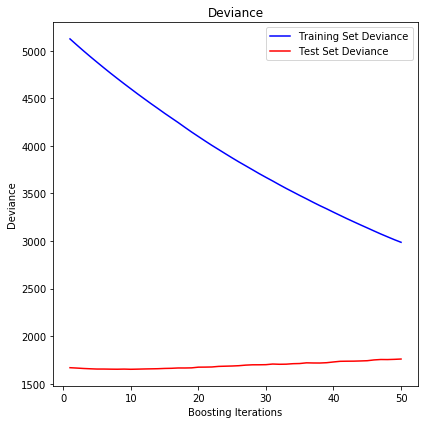

In [1390]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

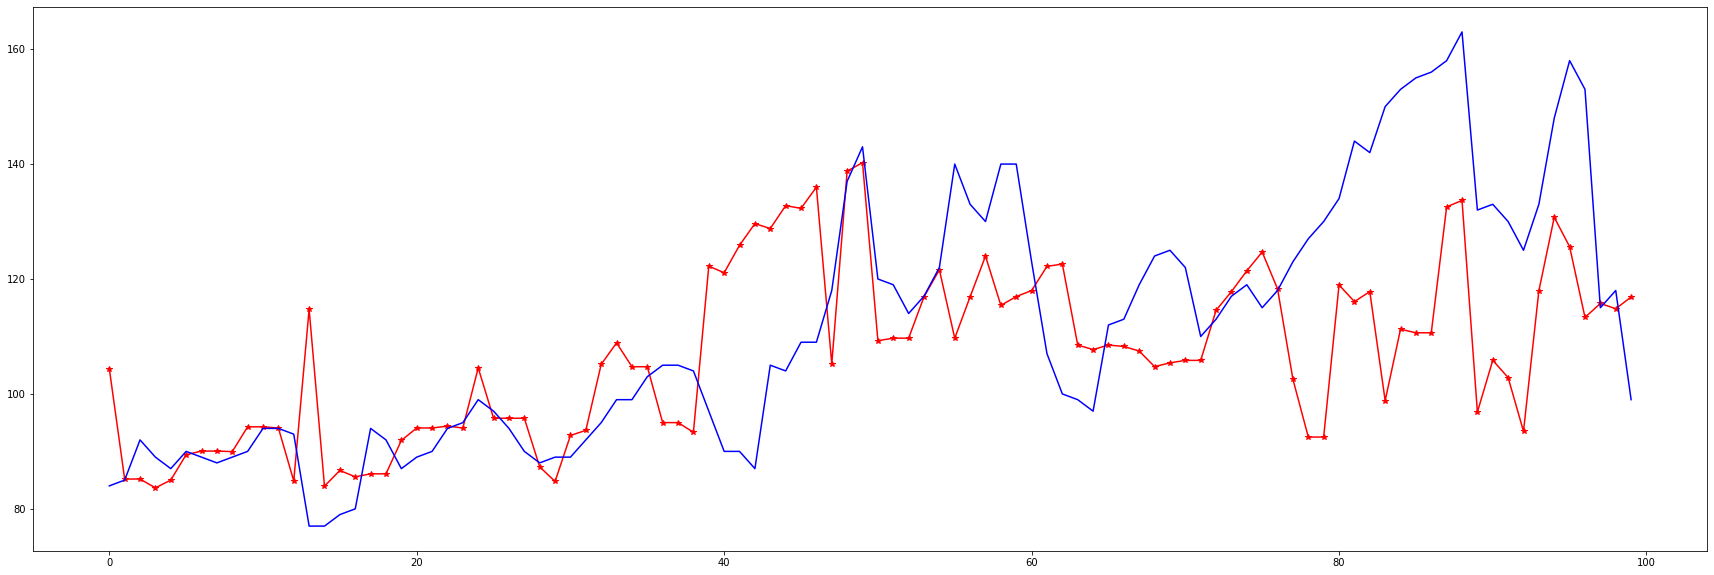

In [1391]:
y=y_test.values
plt.rcParams['figure.figsize'] = (30, 10.0)
plt.plot(y_pred[:100],marker='*', ls='-',color='red', label='data', alpha=1)
plt.plot(y[:100],marker='', ls='-',color='blue', label='data', alpha=1)

In [1392]:
score = np.sqrt(((y_pred - y_test) ** 2).mean()) 
score

41.94521573206539

In [1327]:
help(ParameterGrid)

NameError: name 'ParameterGrid' is not defined

In [1362]:
from sklearn.model_selection import ParameterGrid

In [1368]:
for i in ParameterGrid(parameters):

{'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 100}
{'max_depth': 1, 'min_samples_split': 3, 'n_estimators': 100}
{'max_depth': 1, 'min_samples_split': 4, 'n_estimators': 100}
{'max_depth': 1, 'min_samples_split': 5, 'n_estimators': 100}
{'max_depth': 1, 'min_samples_split': 6, 'n_estimators': 100}
{'max_depth': 1, 'min_samples_split': 7, 'n_estimators': 100}
{'max_depth': 1, 'min_samples_split': 8, 'n_estimators': 100}
{'max_depth': 1, 'min_samples_split': 9, 'n_estimators': 100}
{'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 100}
{'max_depth': 2, 'min_samples_split': 3, 'n_estimators': 100}
{'max_depth': 2, 'min_samples_split': 4, 'n_estimators': 100}
{'max_depth': 2, 'min_samples_split': 5, 'n_estimators': 100}
{'max_depth': 2, 'min_samples_split': 6, 'n_estimators': 100}
{'max_depth': 2, 'min_samples_split': 7, 'n_estimators': 100}
{'max_depth': 2, 'min_samples_split': 8, 'n_estimators': 100}
{'max_depth': 2, 'min_samples_split': 9, 'n_estimators': 100}
{'max_de

In [1404]:
parameters={'max_depth':range(1,10),'n_estimators':[10,30,50,70,100,150,200],'min_samples_split':range(2,10)}

In [1405]:
best_score=float('inf')
for g in ParameterGrid(parameters):
    reg.set_params(**g)
    reg.fit(X_train,y_train)
    y_pred=reg.predict(X_test)
    # save if best
    score = np.sqrt(((y_pred - y_test) ** 2).mean())
    if score < best_score:
        best_score = score
        best_grid = g

print("score: %0.5f" % best_score)
print("Grid:", best_grid)

score: 40.48618
Grid: {'max_depth': 6, 'min_samples_split': 5, 'n_estimators': 30}


In [1407]:
reg.get_params(deep=True)

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.01,
 'loss': 'ls',
 'max_depth': 9,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 9,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [394]:
ensemble.GradientBoostingRegressor().get_params(deep=True)

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [1369]:
def score(y_pred,y_test):
    c=-np.sqrt(((np.array(y_pred) - np.array(y_test)) ** 2).mean())
    return c

In [ ]:
cv = [(slice(None), slice(None))]

In [1370]:
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer,accuracy_score,mean_absolute_error

parameters={'max_depth':range(1,10),'n_estimators':[100],'min_samples_split':range(2,10)}
scoring_fnc = make_scorer(score)
kfold=KFold(n_splits=5)

In [330]:
# for train_index,test_index in kfold.split(range(6)):

#     print('TRAIN:',train_index,"TEST",test_index)

In [591]:
params = {'learning_rate': 0.01,
          'loss': 'ls'}

In [1371]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(ensemble.GradientBoostingRegressor(**params),parameters,scoring_fnc,cv=kfold)

In [1372]:
grid=grid.fit(X_train,y_train)

In [1373]:
reg = grid.best_estimator_

In [1374]:
grid.best_score_

-52.80962042704255

In [1375]:
for key in parameters.keys():
    print('%s: %d' % (key,reg.get_params()[key]))

max_depth: 9
n_estimators: 100
min_samples_split: 2


In [1376]:
pd.DataFrame(grid.cv_results_).T

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
mean_fit_time,0.136355,0.134727,0.132781,0.132675,0.132441,0.132358,0.132521,0.132169,0.275219,0.277776,...,1.88578,1.86598,2.79908,2.64744,2.55147,2.4977,2.4007,2.35315,2.29729,2.26258
std_fit_time,0.00391302,0.000930535,0.000247222,0.000402274,0.000214684,0.000439587,0.000427552,0.000202744,0.00367756,0.00615469,...,0.0417169,0.0407087,0.0534292,0.0504111,0.0424029,0.0552815,0.0459694,0.0445419,0.0510968,0.0442054
mean_score_time,0.00243559,0.00276647,0.00224252,0.00229816,0.00227895,0.00226622,0.00222912,0.00221987,0.00325875,0.00336437,...,0.0082366,0.00810437,0.0103125,0.00963774,0.00959587,0.0101577,0.00940166,0.00931244,0.00971041,0.00929432
std_score_time,0.000318365,0.00066948,2.13303e-05,3.2983e-05,0.000154547,6.67615e-05,3.89543e-05,5.32413e-05,0.000346873,0.000229299,...,0.000109977,5.09746e-05,0.00093054,0.000195362,0.000179653,0.000709261,0.000139673,0.000136368,0.000528304,0.000157144
param_max_depth,1,1,1,1,1,1,1,1,2,2,...,8,8,9,9,9,9,9,9,9,9
param_min_samples_split,2,3,4,5,6,7,8,9,2,3,...,8,9,2,3,4,5,6,7,8,9
param_n_estimators,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
params,"{'max_depth': 1, 'min_samples_split': 2, 'n_es...","{'max_depth': 1, 'min_samples_split': 3, 'n_es...","{'max_depth': 1, 'min_samples_split': 4, 'n_es...","{'max_depth': 1, 'min_samples_split': 5, 'n_es...","{'max_depth': 1, 'min_samples_split': 6, 'n_es...","{'max_depth': 1, 'min_samples_split': 7, 'n_es...","{'max_depth': 1, 'min_samples_split': 8, 'n_es...","{'max_depth': 1, 'min_samples_split': 9, 'n_es...","{'max_depth': 2, 'min_samples_split': 2, 'n_es...","{'max_depth': 2, 'min_samples_split': 3, 'n_es...",...,"{'max_depth': 8, 'min_samples_split': 8, 'n_es...","{'max_depth': 8, 'min_samples_split': 9, 'n_es...","{'max_depth': 9, 'min_samples_split': 2, 'n_es...","{'max_depth': 9, 'min_samples_split': 3, 'n_es...","{'max_depth': 9, 'min_samples_split': 4, 'n_es...","{'max_depth': 9, 'min_samples_split': 5, 'n_es...","{'max_depth': 9, 'min_samples_split': 6, 'n_es...","{'max_depth': 9, 'min_samples_split': 7, 'n_es...","{'max_depth': 9, 'min_samples_split': 8, 'n_es...","{'max_depth': 9, 'min_samples_split': 9, 'n_es..."
split0_test_score,-66.881,-66.881,-66.881,-66.881,-66.881,-66.881,-66.881,-66.881,-65.2827,-65.2827,...,-53.6146,-53.4222,-52.1364,-52.0623,-52.2248,-52.2313,-52.2657,-52.1668,-52.2403,-52.1515
split1_test_score,-69.5751,-69.5751,-69.5751,-69.5751,-69.5751,-69.5751,-69.5751,-69.5751,-68.1843,-68.1843,...,-53.9737,-54.0807,-51.6002,-51.5864,-51.5505,-51.7994,-51.8263,-52.0118,-52.1812,-52.3649


In [598]:
math.log(4,2)

2.0

In [1433]:
a=pd.DataFrame([1,2,3],columns=['a'])
b=pd.DataFrame([1,4,3,4],columns=['c'])

In [1438]:
d=b.drop(['c'],axis=1)

In [1417]:
c=pd.concat([a,b],axis=1)

In [1425]:
a

,a
0,1
1,2
2,3


In [1426]:
b

,a
0,1
1,4
2,3
3,4


In [1443]:
c=d.drop(0)

In [1446]:
c['b']=[2,3,4]

In [1448]:
c.join(a)

,b,a
1,2,2.0
2,3,3.0
3,4,NaN


In [1503]:
import multiprocessing

In [1529]:
multiprocessing.Pool(5).imap(hhh,range(10))

1
4
3
2
0
5
6
7
8
9


In [1528]:
def hhh(i):
    print(i)